## Variable Initialization and Imports

In [1]:
import pandas as pd
from sklearn import linear_model
import csv
import matplotlib.pyplot as plt
from eyeInfo import EyeInfo
import numpy as np

output = './csv/output/center_nata.csv'
train_imput = './csv/center_nata_fixed_train_data.csv'
predict_input = './csv/center_nata_predict_train_data.csv'

fieldnames = ['screen_x', 'screen_y','left_iris_x','left_iris_y','right_iris_x','right_iris_y']

calib_points = [
    { "x": 200, "y": 200 },
    { "x": 1672, "y": 200 },
    { "x": 936, "y": 472 },
    { "x": 200, "y": 744 },
    { "x": 1672, "y": 744 }
]

def train_to_validate_calib():
    dataset_train_path = train_imput
    dataset_predict_path = predict_input

    data = pd.read_csv(dataset_train_path)

    X = data[['left_iris_x', 'left_iris_y', 'right_iris_x', 'right_iris_y']]
    y = data[['point_x', 'point_y']]

    model = linear_model.LinearRegression()
    model.fit(X, y)

    dados_teste = pd.read_csv(dataset_predict_path)
    eye_positions = dados_teste[['left_iris_x', 'left_iris_y', 'right_iris_x', 'right_iris_y']].values
    previsoes = model.predict(dados_teste)

    combined_predictions = np.concatenate((previsoes, eye_positions), axis=1)
    return combined_predictions.tolist()

## Reading CSVs

In [2]:
teste = train_to_validate_calib()

with open(output, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()

    for row in teste:
        writer.writerow({'screen_x': row[0], 'screen_y': row[1], 'left_iris_x': row[2],'left_iris_y': row[3],'right_iris_x': row[4],'right_iris_y': row[5]})

## Instancing class and initializing points 

In [3]:
eye = EyeInfo(calib_points=calib_points, dataset=output)
eye.init_screen_resolution()
eye.init_calib_points()
eye.init_points()

## Initializing left eye, right eye and prediction arrays to plot

In [4]:
calib_points_x , calib_points_y = eye.get_points(eye.calib_points)

right_eye_x, right_eye_y = eye.get_points(eye.right_eye)

left_eye_x, left_eye_y = eye.get_points(eye.left_eye)

prediction_x, prediction_y = eye.get_points(eye.prediction)

## Plotting data

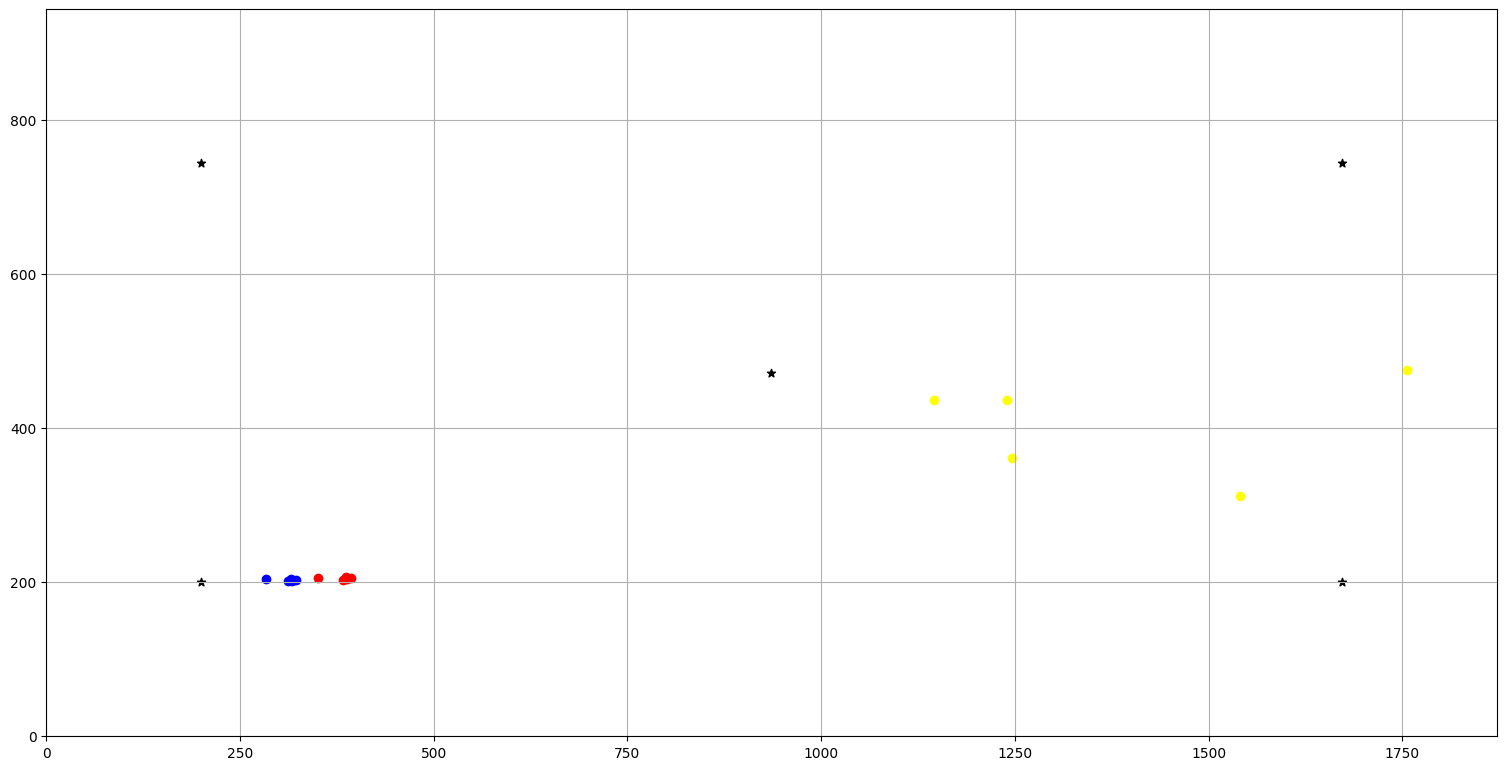

In [5]:
plt.scatter(right_eye_x, right_eye_y, marker='o', color='blue', label='right eye')
plt.scatter(left_eye_x, left_eye_y, marker='o', color='red', label='left eye')
plt.scatter(prediction_x, prediction_y, marker='o', color='yellow', label='predicted value')
plt.scatter(calib_points_x, calib_points_y, marker="*", color='black', label='calib points')

fig = plt.gcf()
fig.set_size_inches(eye.k_screen_width / 100, eye.k_screen_height / 100)

ax = plt.gca()
ax.set_xlim(0, eye.k_screen_width)
ax.set_ylim(0, eye.k_screen_height)

plt.grid(True)

plt.show()